In [1]:
# https://github.com/NielsRogge/Transformers-Tutorials/blob/master/ViTMAE/ViT_MAE_visualization_demo.ipynb

In [9]:
import torch
from torchvision import datasets, transforms

from transformers import ViTMAEConfig, ViTMAEForPreTraining

from src.datasets import CustomCIFAR10Dataset

from src.plotters import plot_mae
from src.utils import select_device, extract_mae

%reload_ext autoreload
%autoreload 2

device = select_device()

In [10]:
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
])

test_dataset = datasets.CIFAR10(
    root="/Users/martin/Sites/datasets/third-party/pytorch-datasets/", 
    download=True, 
    train=False, 
    transform=transform
)
testing_dataset = [(image, target) for image, target in test_dataset]

test_dataset = CustomCIFAR10Dataset(testing_dataset)

Files already downloaded and verified


In [11]:
# https://keras.io/examples/vision/masked_image_modeling/ (modified from)
vitmaeconfig = {
    'hidden_size': 128,
    'num_hidden_layers': 6,
    'num_attention_heads': 4,
    'intermediate_size': 256,  # 2 * hidden_size
    'hidden_dropout_prob': 0.0,
    'attention_probs_dropout_prob': 0.0,
    'image_size': 48,
    'patch_size': 6,
    'num_channels': 3,
    'decoder_hidden_size': 64,
    'decoder_num_hidden_layers': 2,
    'decoder_num_attention_heads': 4,
    'decoder_intermediate_size': 128,  # 2 * hidden_size
    'layer_norm_eps': 1e-6,
    'mask_ratio': 0.75  # default: 0.75
}

MODEL_PATH = "model.pth"
checkpoint = torch.load(MODEL_PATH, map_location=device)

model = ViTMAEForPreTraining(config=ViTMAEConfig(**vitmaeconfig)).to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

dict_keys(['original_image', 'image_masked', 'reconstructed_image', 'image_reconstructed_visible'])


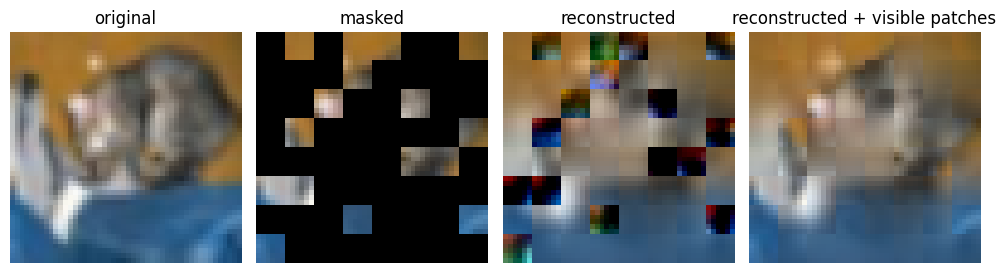

In [14]:
mae_image_results = extract_mae(model, test_dataset, image_index=0, device=device, denormalize=False)
print(mae_image_results.keys())

plot_mae(mae_image_results)